
# YES BANK STOCK CLOSING PRICE PREDICTION #

<img src="YES BANK.png" style ="width:750px;height:800" title="Yes Bank">

# importing libraries #

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (r2_score,
mean_squared_error,  mean_absolute_percentage_error,
mean_absolute_error)
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

C:\Users\yashs\AppData\Local\Temp\ipykernel_1192\3411551226.py:6: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


# Load the Data #

In [38]:
df =pd.read_csv('data_YesBank_StockPrices.csv')

df.head()
     

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


# Description of Data #

In [40]:
len(df)

185

In [41]:
df.shape

(185, 5)

In [42]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


# EDA #

## **Univariate Analysis**

In [46]:
col = list(df.columns)

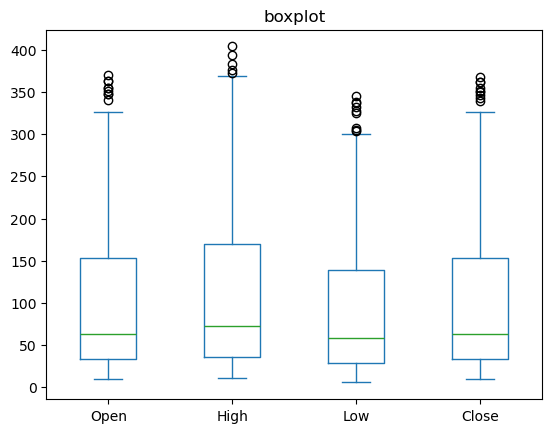

In [47]:
ax = df[col].plot(kind='box', title='boxplot')

plt.show()

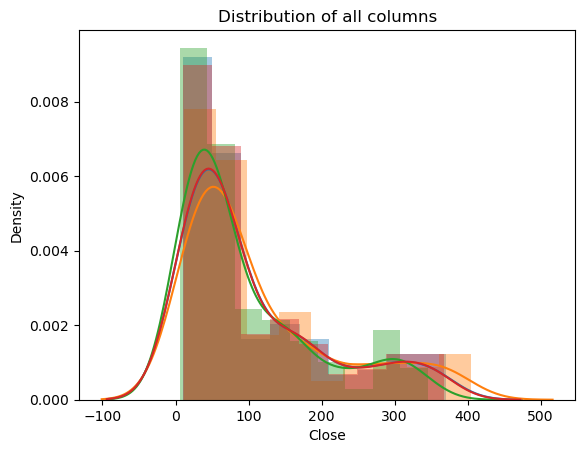

In [48]:
sns.distplot(df['Open'],kde=True)
sns.distplot(df['High'],kde=True)
sns.distplot(df['Low'],kde=True)
sns.distplot(df['Close'],kde=True)
plt.title("Distribution of all columns")
plt.show()


## **Bivariate** **Analysis**

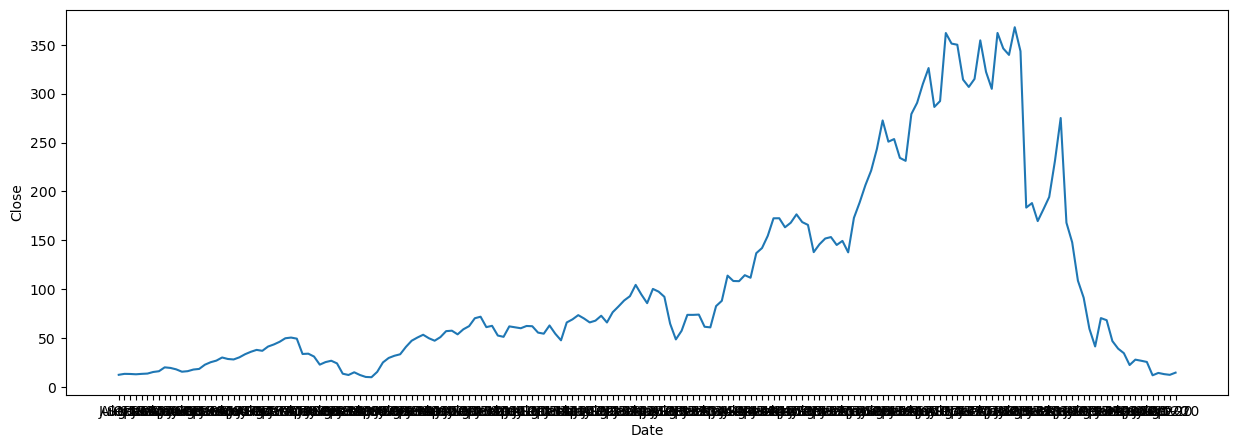

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Date',y='Close',data=df)
plt.show()

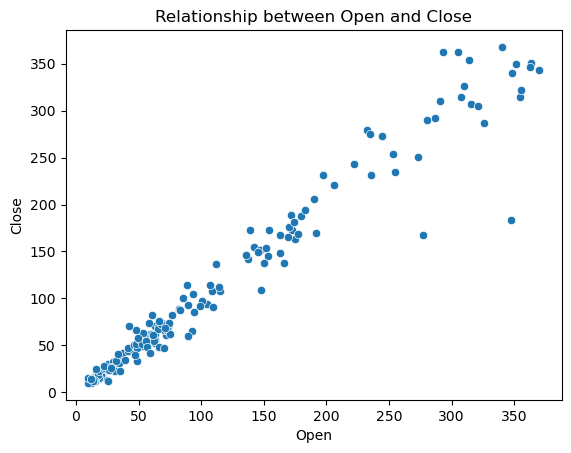

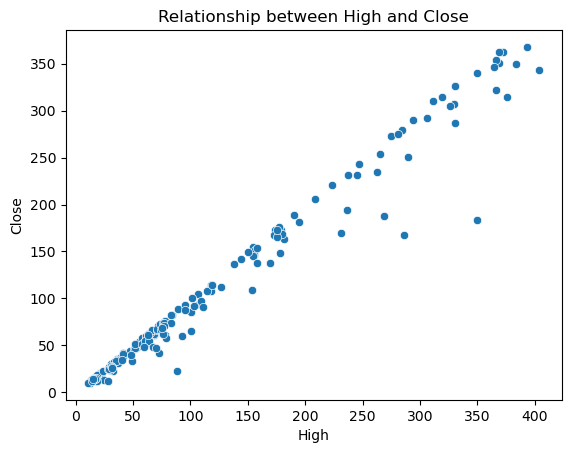

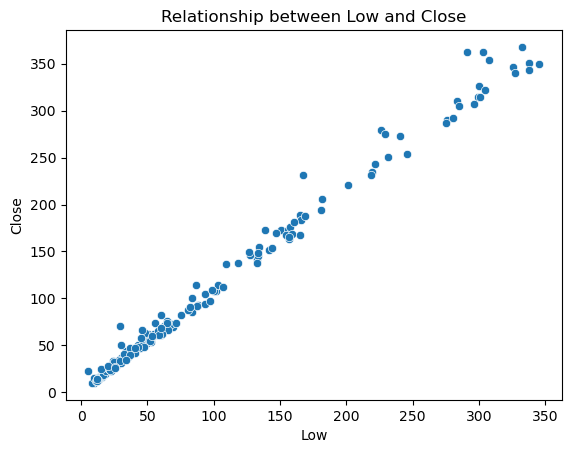

In [51]:
for i in df.columns[1:-1]:
  plt.title(f'Relationship between {i} and Close')
  sns.scatterplot(x=i,y='Close',data=df)
  plt.show()

In [52]:
df.set_index('Date',inplace=True)

In [53]:
!pip install mplfinance

import mplfinance as mpf

df_candle = df[['Open', 'High', 'Low', 'Close']]


Defaulting to user installation because normal site-packages is not writeable


## **Multivariate Analysis**

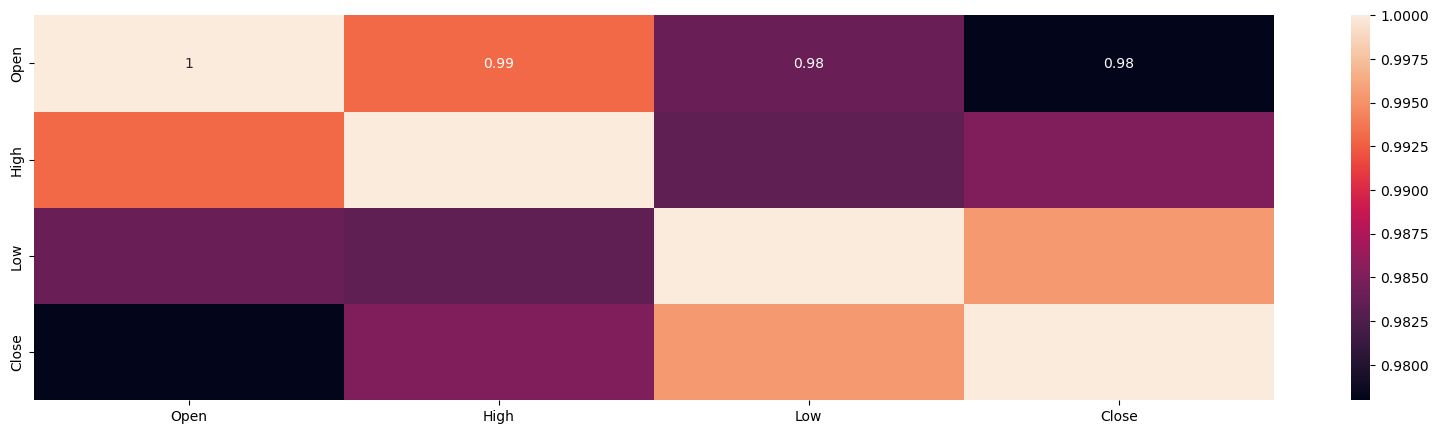

In [69]:
plt.figure(figsize=(20,5))
cor = sns.heatmap(df.corr(),annot=True)

In [71]:
pw = PowerTransformer(method='box-cox',standardize=True)
cf= df[list(df.columns)]
df['Close']

Date
Jul-05    12.46
Aug-05    13.42
Sep-05    13.30
Oct-05    12.99
Nov-05    13.41
          ...  
Jul-20    11.95
Aug-20    14.37
Sep-20    13.15
Oct-20    12.42
Nov-20    14.67
Name: Close, Length: 185, dtype: float64

In [73]:
ys = pd.DataFrame(pw.fit_transform(cf))
ys.head()

,0,1,2,3
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


<Axes: >

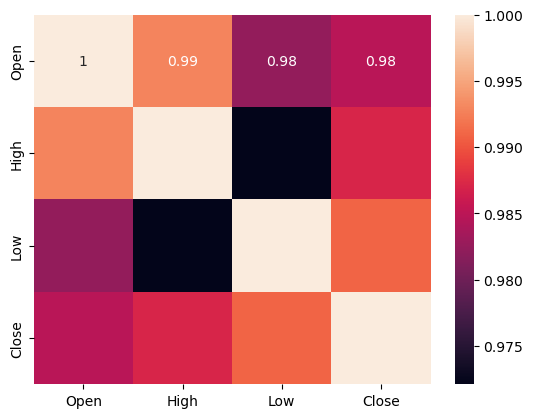

In [75]:
ys.rename(columns={0:'Open',1:'High',2:'Low',3:'Close'},inplace=True)
sns.heatmap(ys.corr(),annot=True)
     

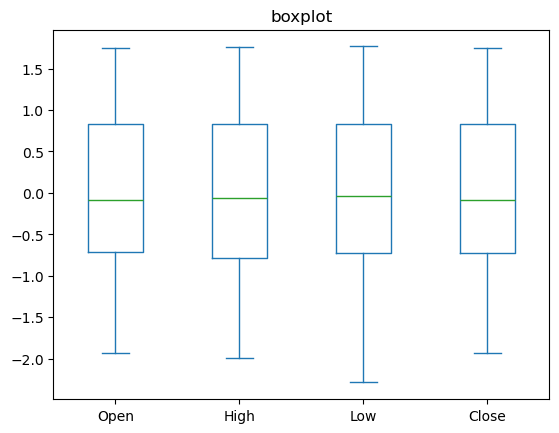

In [76]:
col = list(ys.columns)
ax = ys[col].plot(kind='box', title='boxplot')
plt.show()

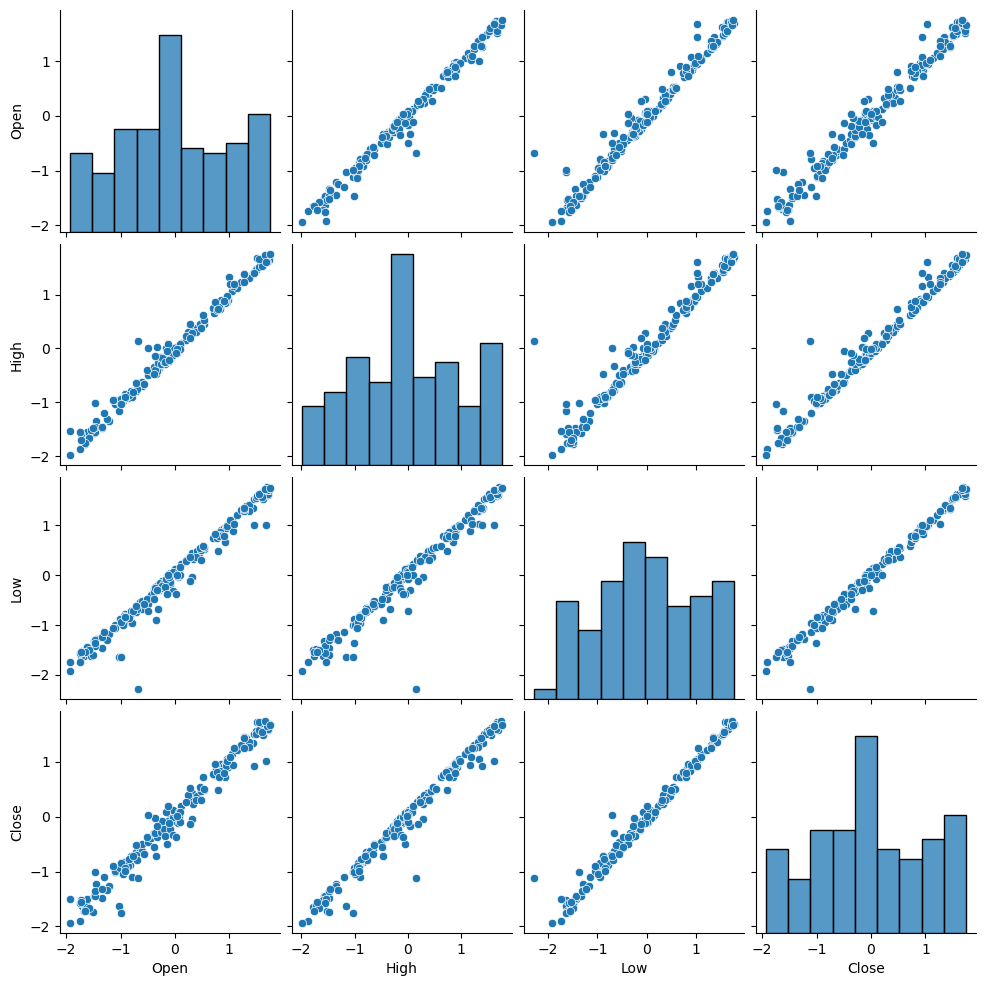

In [78]:
sns.pairplot(ys)

# Data Preprocessing


In [81]:
ys.head()

,Open,High,Low,Close
0,-1.671724,-1.762828,-1.622235,-1.709751
1,-1.704449,-1.700176,-1.518365,-1.635775
2,-1.635576,-1.700867,-1.539820,-1.644731
3,-1.656505,-1.728898,-1.529800,-1.668243
4,-1.645239,-1.771672,-1.493670,-1.636518


In [82]:
dependent_variable = 'Close'
independent_variable = list(set(ys.columns.tolist())-{dependent_variable})
x=df[independent_variable].values
y=df[dependent_variable].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [84]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

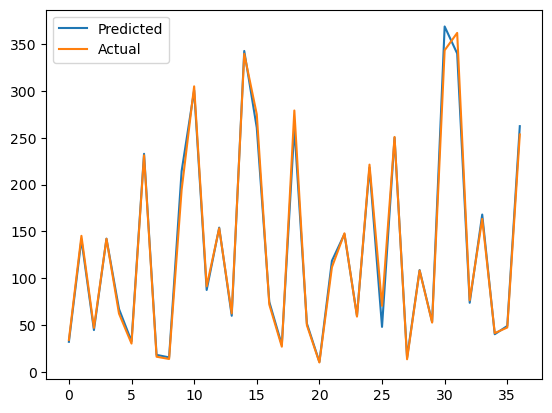

In [85]:
y_pred = reg.predict(x_test)
linear_r2 = r2_score(y_pred,y_test)
plt.plot(y_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# KNN

In [87]:
knn = KNeighborsRegressor()
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
model = GridSearchCV(knn,params,cv=5)
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [88]:
model.best_params_

{'n_neighbors': 2}

In [89]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

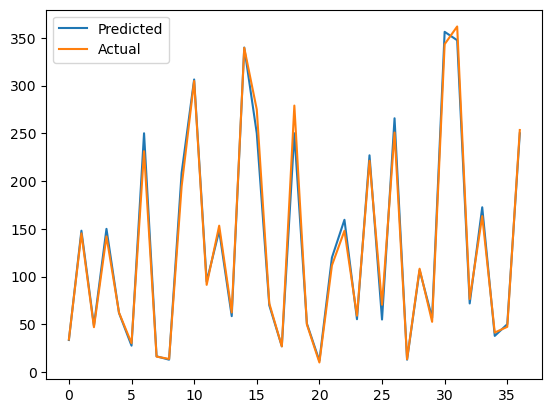

In [90]:
knn_pred = knn.predict(x_test)
r2_knn = r2_score(y_test,knn_pred)
plt.plot(knn_pred)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# RandomForest

In [92]:
rf = RandomForestRegressor()
params = {'n_estimators':[100,200,300],'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],'max_features':['sqrt', 'log2', None]}
rf_model = GridSearchCV(rf,params,cv=7)
rf_model.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300]})

In [93]:
rf_model.best_params_

{'criterion': 'squared_error', 'max_features': None, 'n_estimators': 300}

In [94]:
rf = RandomForestRegressor(criterion= 'friedman_mse', max_features= None, n_estimators= 300)
rf.fit(x_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=300)

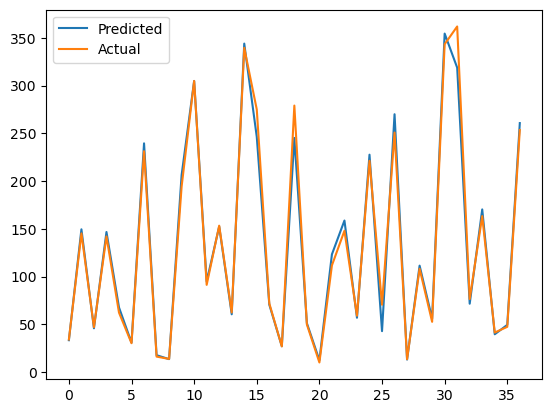

In [95]:
rf_predict_ = rf.predict(x_test)
plt.plot(rf_predict_)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Ridge Regression

In [97]:
ridge =Ridge()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, param, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)
ridge_regressor.best_params_

{'alpha': 100}

In [98]:
ridge =Ridge(alpha= 150)
ridge.fit(x_train,y_train)

Ridge(alpha=150)

In [99]:
y_pred_ridge = ridge.predict(x_test)
ridge_r2 = r2_score(y_test,y_pred_ridge)

ridge_r2

0.993026255093247

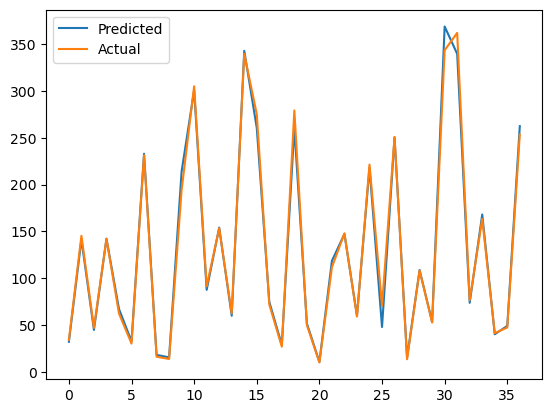

In [100]:
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Lasso

In [102]:
lasso =Lasso()
param = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, param, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [103]:
lasso_regressor.best_params_
     

{'alpha': 2.5}

In [104]:
lasso =Lasso(alpha= 1.6)
     

lasso.fit(x_train,y_train)

Lasso(alpha=1.6)

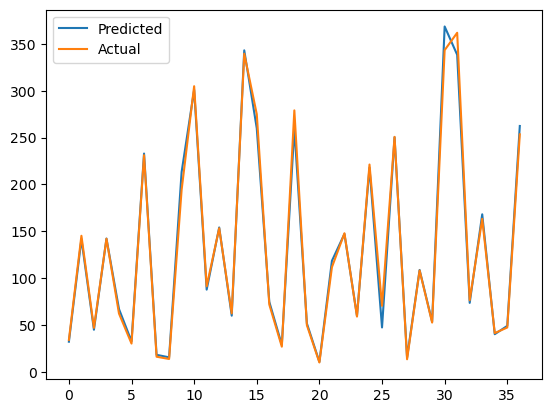

In [105]:
lasso_predict = lasso.predict(x_test)
     

lasso_r2 = r2_score(lasso_predict,y_test)
     

plt.plot(lasso_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()

# Elasticnet

In [107]:
elastic =ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, param, scoring='neg_mean_squared_error', cv=5)
elastic_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [108]:
elastic_regressor.best_params_

{'alpha': 5, 'l1_ratio': 0.1}

In [109]:
elastic =ElasticNet(alpha = 5, l1_ratio = 0.1)
     

elastic.fit(x_train,y_train)

ElasticNet(alpha=5, l1_ratio=0.1)

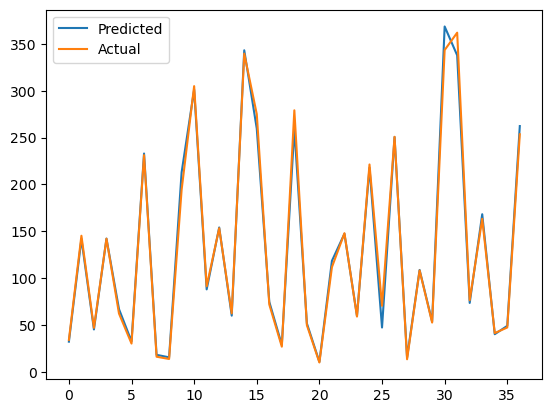

In [110]:
elastic_predict = elastic.predict(x_test)
     

elastic_r2 = r2_score(elastic_predict,y_test)
     

plt.plot(elastic_predict)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])

plt.show()